In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Load the dataset
data = pd.read_csv('monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv')
data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN


In [44]:
#Filter out invalid rows
data = data[~data['MONAT'].str.contains('Summe')]

# Function to convert "YYYYMM" to "YYYY-MM"
def convert_date_format(date_str):
    # Extract year (first four digits) and month (last two digits)
    year = date_str[:4]
    month = date_str[-2:]
    
    # Combine year and month in the correct format
    formatted_date = f"{year}-{month}"
    
    return formatted_date

# Apply the function to the entire 'Date' column
data['Date'] = data['MONAT'].apply(convert_date_format)

data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,Date
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN,2024-01
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN,2024-02
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN,2024-03
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN,2024-04
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN,2024-05


In [45]:
#Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,Date,Year,Month
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN,2024-01-01,2024,1
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN,2024-02-01,2024,2
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN,2024-03-01,2024,3
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN,2024-04-01,2024,4
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN,2024-05-01,2024,5


In [46]:
# Filter and rename the relevant columns
df_filtered = data[['MONATSZAHL', 'AUSPRAEGUNG', 'WERT', 'Year', 'Month']].copy()

# Rename the columns
df_filtered.columns = ['Category', 'Accident-type', 'Value', 'Year', 'Month']

# Display the filtered and renamed dataframe
print(df_filtered.head())

         Category Accident-type  Value  Year  Month
0  Alkoholunfälle     insgesamt    NaN  2024      1
1  Alkoholunfälle     insgesamt    NaN  2024      2
2  Alkoholunfälle     insgesamt    NaN  2024      3
3  Alkoholunfälle     insgesamt    NaN  2024      4
4  Alkoholunfälle     insgesamt    NaN  2024      5


In [47]:
# Filter data for category 'Alkoholunfälle' and 'Type' 'insgesamt'
df_filtered = df_filtered[(df_filtered['Category'] == 'Alkoholunfälle') & (df_filtered['Accident-type'] == 'insgesamt')]

# Filter data contains "NaN"
df_filtered = df_filtered.dropna()

print(df_filtered.head())

          Category Accident-type  Value  Year  Month
25  Alkoholunfälle     insgesamt   19.0  2022      1
26  Alkoholunfälle     insgesamt   32.0  2022      2
27  Alkoholunfälle     insgesamt   28.0  2022      3
28  Alkoholunfälle     insgesamt   34.0  2022      4
29  Alkoholunfälle     insgesamt   57.0  2022      5


In [49]:
# Convert Year and Month into a single datetime column
df_filtered['Date'] = pd.to_datetime(df_filtered['Year'].astype(str) + '-' + df_filtered['Month'].astype(str))

# Sort by date
df_filtered = df_filtered.sort_values('Date')

# Reset the index and drop the original index column
df_filtered.reset_index(drop=True, inplace=True)

print(df_filtered.head())

         Category Accident-type  Value  Year  Month       Date
0  Alkoholunfälle     insgesamt   78.0  2000      1 2000-01-01
1  Alkoholunfälle     insgesamt   53.0  2000      2 2000-02-01
2  Alkoholunfälle     insgesamt   73.0  2000      3 2000-03-01
3  Alkoholunfälle     insgesamt   78.0  2000      4 2000-04-01
4  Alkoholunfälle     insgesamt   96.0  2000      5 2000-05-01


In [50]:
# save the filtered data to a new csv file
df = pd.DataFrame(df_filtered)
df.to_csv('sample_data.csv', index=False)

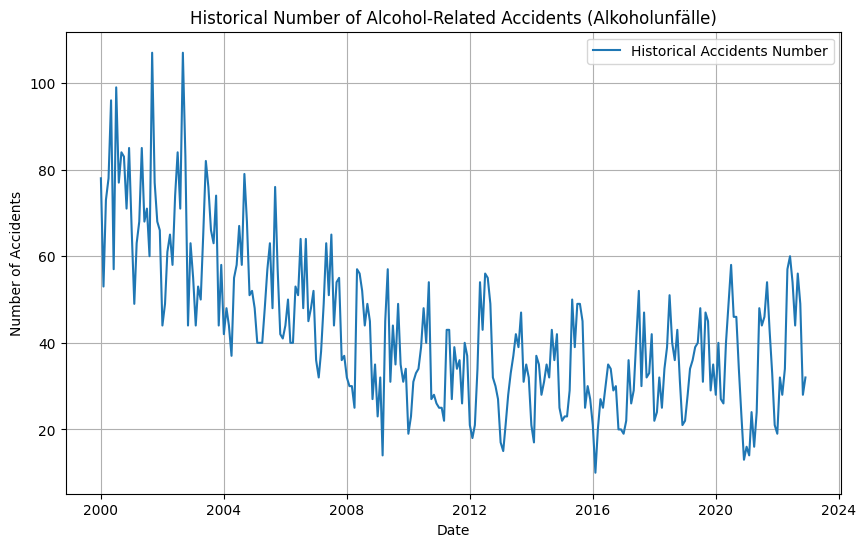

<Figure size 640x480 with 0 Axes>

In [3]:

# Load your data
df = pd.read_csv('sample_data.csv')
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.set_index('Date', inplace=True)
df = df[['Value']]

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Historical Accidents Number')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Historical Number of Alcohol-Related Accidents (Alkoholunfälle)')
plt.legend()
plt.grid(True)
plt.show()

# Save the plot to a jpg file
plt.savefig('historical_accidents_number.jpg')